In [14]:
import numpy as np
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import joblib



Load mnist Data


In [2]:
mnist = fetch_openml('mnist_784', version =1, cache =True, as_frame = True)
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


In [6]:
mnist.data[:12]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

Missing value

In [4]:
ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)

Split the Dataset into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(56000, 784)

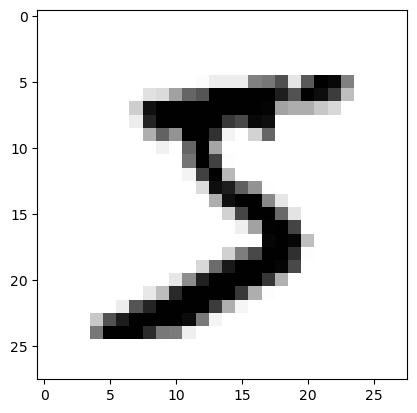

In [12]:
fig_model= plt.imshow(X[0].reshape(28, 28), cmap='binary')
fig_model.figure
plt.show(fig_model)

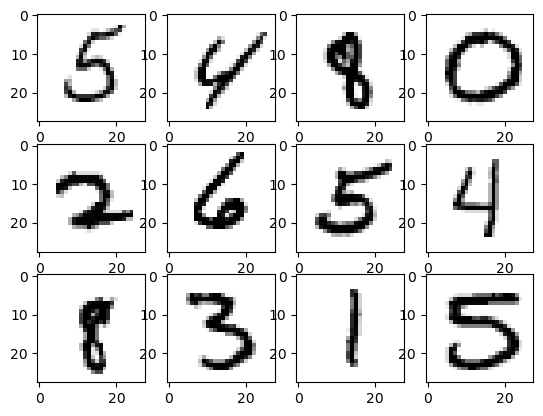

In [13]:
for i in range(12):
# define subplot
 plt.subplot(3,4 , 1 + i)
# plot raw pixel data
 plt.imshow(X_train[i].reshape(28, 28), cmap='binary')

Normalize data

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

PCA for dimensionally reduction

In [7]:
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Models to train and evaluate data
1. Logistic Regression

In [9]:
log_reg = LogisticRegression()

In [17]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [15]:
param_grid= {
    'C': [0.1, 1, 10]
}

log_reg = LogisticRegression(max_iter=1000)

# Perform grid search
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid = param_grid, cv=5, n_jobs= -1)
grid_search_log_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10]})

In [16]:
# Evaluate the best Logistic Regression model
log_reg_best = grid_search_log_reg.best_estimator_

y_pred_log_reg = log_reg_best.predict(X_test_pca)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

In [17]:
print(f"Best Logistic Regression Parameters: {grid_search_log_reg.best_params_}")
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")


Best Logistic Regression Parameters: {'C': 0.1}
Logistic Regression Accuracy: 0.9218571428571428


In [18]:
import joblib

#save
joblib.dump(log_reg_best, "log_reg_model.pkl")

['log_reg_model.pkl']

In [19]:
#load
loaded_model =  joblib.load("log_reg_model.pkl")

In [21]:
# Use the loaded model to make predictions
y_pred_log_reg = loaded_model.predict(X_test_pca) 

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)  # Evaluate accuracy
print(f"Best Logistic Regression Parameters: {grid_search_log_reg.best_params_}")
print(f"Logistic Regression Model Accuracy: {log_reg_accuracy}")

Best Logistic Regression Parameters: {'C': 0.1}
Logistic Regression Model Accuracy: 0.9218571428571428


Classifiaction Report 

In [22]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1343
           1       0.95      0.97      0.96      1600
           2       0.92      0.91      0.91      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.89      0.89      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.94      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



Function for Confusion Matrix

In [23]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

Confusion matrix for logistic regression

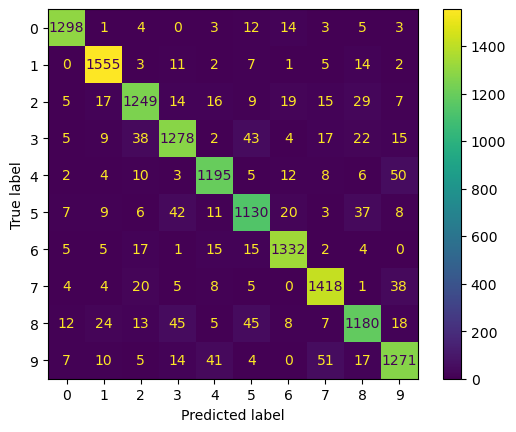

In [24]:
display_confusion_matrix(y_test, y_pred_log_reg)

2.Random Forest

In [25]:
rf = RandomForestClassifier()

In [26]:
rf_params = {
    'n_estimators' : [ 100],
    'max_depth' : [10,20, None],
    
}

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred_rf = rf.predict(X_test_pca)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy}")

print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9367857142857143
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.98      0.98      0.98      1600
           2       0.91      0.94      0.93      1380
           3       0.90      0.93      0.92      1433
           4       0.93      0.95      0.94      1295
           5       0.94      0.90      0.92      1273
           6       0.96      0.96      0.96      1396
           7       0.94      0.94      0.94      1503
           8       0.92      0.89      0.91      1357
           9       0.92      0.91      0.91      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



In [29]:
joblib.dump(rf, "rf_model.pkl")

['rf_model.pkl']

In [32]:
loaded_model1 = joblib.load("rf_model.pkl")

y_pred_rf = loaded_model1.predict(X_test_pca)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest accuracy:" , rf_accuracy )

Random Forest accuracy: 0.9367857142857143


Classification Report Random forest

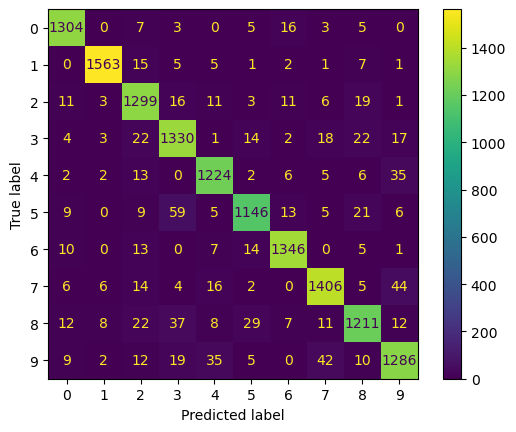

In [49]:
display_confusion_matrix(y_test, y_pred_rf)

3. SVM

In [8]:
# Define SVM Model
svm = SVC()

In [9]:
# Define hyperparameters for grid search
svm_params = {
    'C': [1],
    'kernel': ['rbf']
}

In [10]:
grid_search_svm = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1], 'kernel': ['rbf']})

In [11]:
svm_best = grid_search_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

In [12]:
print(f"Best SVM Parameters: {grid_search_svm.best_params_}")
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(y_test, y_pred_svm))


Best SVM Parameters: {'C': 1, 'kernel': 'rbf'}
SVM Accuracy: 0.9644285714285714
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.93      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.94      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



In [15]:

joblib.dump(svm_best,"svm_model.pkl")
loaded_model = joblib.load("svm_model.pkl")

y_pred_svm = loaded_model.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.9644285714285714


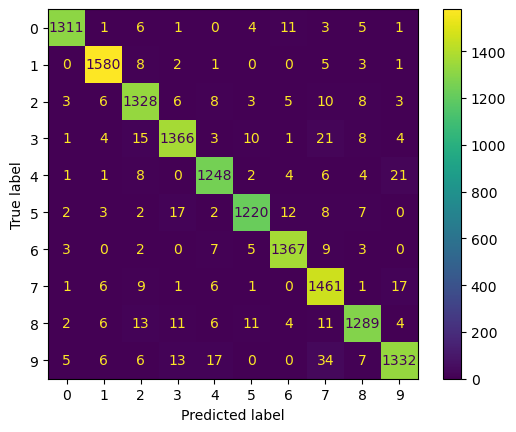

In [74]:
display_confusion_matrix(y_test, y_pred_svm)

Compare all three models classifiers 

In [75]:
print(f"Logistic regression Accuracy :{log_reg_accuracy: .5f}")
print(f"Random Forest Accuracy: {rf_accuracy: .5f}")
print(f"SVM accuracy:{svm_accuracy: .5f}")

Logistic regression Accuracy : 0.92186
Random Forest Accuracy:  0.93679
SVM accuracy: 0.96443


In [76]:
# Compare accuracies
if log_reg_accuracy > svm_accuracy and log_reg_accuracy > rf_accuracy:
    print ('Logistic Regression is the best model with accuracy:' , log_reg_accuracy)
elif svm_accuracy > log_reg_accuracy and svm_accuracy > rf_accuracy:
    print('SVM is the best model with accuracy:', svm_accuracy)
else:
    print('Random Forest  is the best model with accuracy:', rf_accuracy)

SVM is the best model with accuracy: 0.9644285714285714


Conclusion

We evaluate the data set performance of three different machine learning models: Support Vector Machine(SVM), Logistic Regression and random forest.
Based on the accuracy value, I conclude that Support Vector Machine is most suitable model for this mnist database with highest accuracy value 0.96443. 